# Assignment 5: Accuracy Measures
Choosen Datasets:

**Linear Regression**

[Fuel Consumption 2014](https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption)

Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

**Binary Classification**

[Heart Attack Analysis & Prediction Dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

A dataset for heart attack classification

**Multi Class Classification**

[Drug Classification](https://www.kaggle.com/datasets/prathamtripathi/drug-classification)

This database contains information about certain drug types.




### Group Members:


*   Ali Zahedzadeh
*   Melika Noubakhtian


## Linear Regression

Linear regression analysis is used to predict the value of a variable based on the value of another variable

### About The Dataset 

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Dataset**

In [3]:
path = './FuelConsumptionCo2.csv'
df = pd.read_csv(path)

Now let's take a look at the first 5 rows of the data:

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


```df.info()``` shows that we have no NaN value.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Check Null values (We don't have any null values)

In [7]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

Check for duplicate values , we dont have any duplicate value

In [8]:
df[df.duplicated]

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS


**Correlation** 

 correlation matrix is a useful tool for figuring out how different variables are related to each other. By looking at the correlation coefficients between two variables, we can learn how they are related and how changes in one variable may affect the other variables

First we need to convert non numerical values to numerical values

In [9]:
from sklearn.preprocessing import LabelEncoder

Select columns for eoncoding

In [10]:
categorical_column = ['MAKE', 'MODEL', 'TRANSMISSION', 'VEHICLECLASS']
one_hot_column = ['FUELTYPE']

an object of LabelEncoder

In [11]:
le_encoder = LabelEncoder()

Set Categorical encoding for selected columns

In [12]:
df[categorical_column] = df[categorical_column].apply(LabelEncoder().fit_transform)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,0,329,0,2.0,4,10,Z,9.9,6.7,8.5,33,196
1,2014,0,329,0,2.4,4,20,Z,11.2,7.7,9.6,29,221
2,2014,0,330,0,1.5,4,17,Z,6.0,5.8,5.9,48,136
3,2014,0,389,11,3.5,6,11,Z,12.7,9.1,11.1,25,255
4,2014,0,483,11,3.5,6,11,Z,12.1,8.7,10.6,27,244


Set One hot encoding for selected column

In [13]:
df = pd.get_dummies(df, columns=one_hot_column)

In [14]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2014,0,329,0,2.0,4,10,9.9,6.7,8.5,33,196,False,False,False,True
1,2014,0,329,0,2.4,4,20,11.2,7.7,9.6,29,221,False,False,False,True
2,2014,0,330,0,1.5,4,17,6.0,5.8,5.9,48,136,False,False,False,True
3,2014,0,389,11,3.5,6,11,12.7,9.1,11.1,25,255,False,False,False,True
4,2014,0,483,11,3.5,6,11,12.1,8.7,10.6,27,244,False,False,False,True


In [15]:
corr = df.drop(columns=['MODELYEAR']).corr()
corr.style.background_gradient(cmap='coolwarm')

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
MAKE,1.000000,0.039068,0.005853,-0.166416,-0.203427,0.193264,-0.246247,-0.174665,-0.222273,0.226347,-0.186504,0.057305,-0.158673,0.102489,-0.031904
MODEL,0.039068,1.000000,0.244648,0.096304,0.080010,-0.002004,0.147394,0.182009,0.161373,-0.148806,0.155492,-0.088906,0.060654,0.090685,-0.098477
VEHICLECLASS,0.005853,0.244648,1.000000,0.240529,0.208528,-0.172934,0.354363,0.430074,0.384678,-0.354073,0.388468,-0.024735,0.125846,0.003160,-0.067216
ENGINESIZE,-0.166416,0.096304,0.240529,1.000000,0.934011,-0.272427,0.832225,0.778746,0.819482,-0.808554,0.874154,-0.093400,0.237674,-0.266920,0.165557
CYLINDERS,-0.203427,0.080010,0.208528,0.934011,1.000000,-0.246456,0.796473,0.724594,0.776788,-0.770430,0.849685,-0.067955,0.194920,-0.339827,0.256011
TRANSMISSION,0.193264,-0.002004,-0.172934,-0.272427,-0.246456,1.000000,-0.350241,-0.348174,-0.352596,0.341119,-0.299393,0.004390,-0.245111,-0.038929,0.178253
FUELCONSUMPTION_CITY,-0.246247,0.147394,0.354363,0.832225,0.796473,-0.350241,1.000000,0.965718,0.995542,-0.935613,0.898039,-0.139180,0.567070,-0.319701,0.045660
FUELCONSUMPTION_HWY,-0.174665,0.182009,0.430074,0.778746,0.724594,-0.348174,0.965718,1.000000,0.985804,-0.893809,0.861748,-0.154498,0.598684,-0.269105,-0.018973
FUELCONSUMPTION_COMB,-0.222273,0.161373,0.384678,0.819482,0.776788,-0.352596,0.995542,0.985804,1.000000,-0.927965,0.892129,-0.145396,0.583125,-0.303950,0.022451
FUELCONSUMPTION_COMB_MPG,0.226347,-0.148806,-0.354073,-0.808554,-0.770430,0.341119,-0.935613,-0.893809,-0.927965,1.000000,-0.906394,0.176731,-0.425172,0.300779,-0.119499


Our goal is to predict the amount of CO2 EMISSION based on the available data

Let's select some features to explore more.
based on above corr matrix we select 3 of high corr (becase if corr is higher it's mean good relation beetwen variables)

In [16]:
data = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

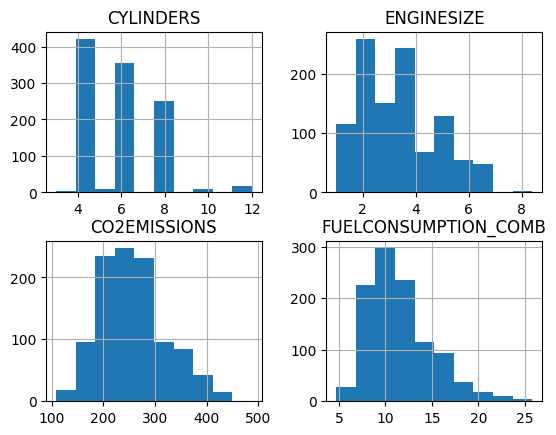

In [17]:
viz = data[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

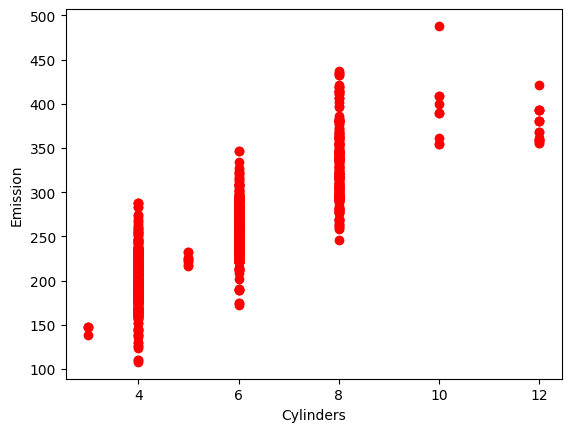

In [18]:
plt.scatter(data.CYLINDERS, data.CO2EMISSIONS, color='red')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

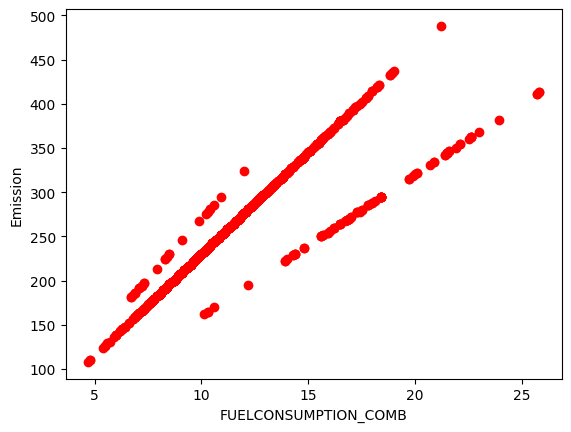

In [19]:
plt.scatter(data.FUELCONSUMPTION_COMB, data.CO2EMISSIONS, color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

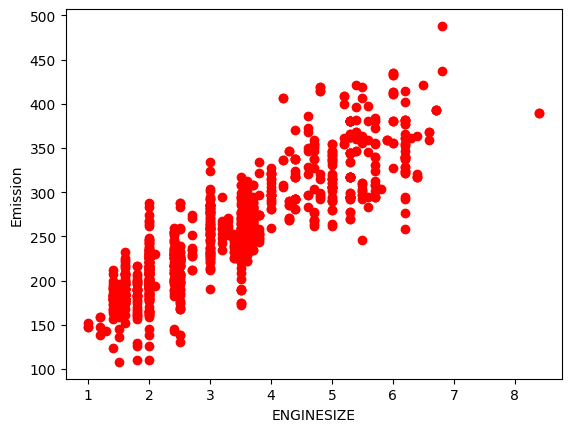

In [20]:
plt.scatter(data.ENGINESIZE, data.CO2EMISSIONS, color='red')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.show()

From above charts we decide to Use ```ENGINESIZE```  for regression

Because There is a relatively linear relationship

**import libraries for ML algorithms**

In [21]:
#Function for split data beetwen Train and Split
from sklearn.model_selection import train_test_split
#Function for Linear Regression model
from sklearn.linear_model import LinearRegression
#Accuracy metric
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

Output columns is ```CO2EMISSION```

In [22]:
X = df.drop('CO2EMISSIONS', axis=1)
y = df['CO2EMISSIONS']

Split the data into training and testing sets

80 % for train

20% for test

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialize the model

In [24]:
model = LinearRegression()

Train the model

In [25]:
X_train = np.asanyarray(X_train[['ENGINESIZE']])
model.fit(X_train, y_train)

LinearRegression()

Make predictions on the test set

In [26]:
X_test = np.asanyarray(X_test[['ENGINESIZE']])
y_pred = model.predict(X_test)

Calculate regression metrics

<b>Mean Absolute Error (MAE):</b>

* Interpretation:

MAE measures the average absolute difference between predicted and actual values. A lower MAE indicates a better fit.

* Analysis:

Compare the MAE to the scale of the target variable. A lower MAE suggests that the model's predictions are closer to the actual values.

<b>Mean Squared Error (MSE):</b>

* Interpretation: 

MSE measures the average of the squared differences between predicted and actual values. It penalizes larger errors more heavily.

* Analysis: 

Similar to MAE, MSE should be compared to the scale of the target variable. A lower MSE indicates a better fit.

<b>Mean Absolute Percentage Error (MAPE):</b>

* Interpretation: 

MAPE measures the percentage difference between predicted and actual values.

* Analysis: 

MAPE is useful when you want to understand the relative size of prediction errors. A lower MAPE indicates a better fit.

<b>R-squared (R2) Score:</b>

* Interpretation: 

R2 measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R2 indicates a better fit.

* Analysis: 

R2 ranges from 0 to 1. A value closer to 1 suggests that the model explains a large portion of the variance in the target variable.

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Percentage Error (MAPE):', mape)
print('R-squared (R2) Score:', r2)

Mean Absolute Error (MAE): 24.09725741170784
Mean Squared Error (MSE): 985.9381692274999
Mean Absolute Percentage Error (MAPE): 0.10268043126886091
R-squared (R2) Score: 0.7615595731934373


Simple Scatter plot

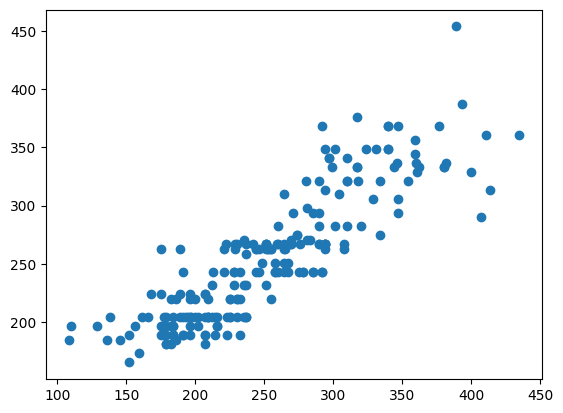

In [29]:
plt.scatter(y_test,y_pred)

Scatter plot with regression line

<Axes: xlabel='CO2EMISSIONS'>

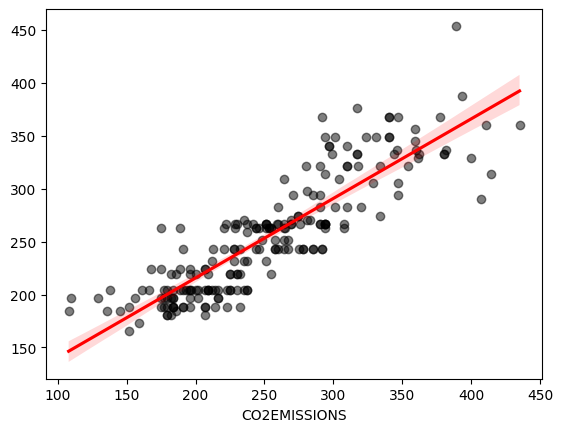

In [38]:
sns.regplot(x = y_test, y = y_pred,
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"})

## Logistic Regression (for  Binary Classification)

Logistic regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class or not

### About The Dataset 

<div dir=ltr style="direction: ltr;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<center>

| Column | Description |
|:-----------:|:------:|
| age |Age of the person|
| sex | Gender of the person|
| exng |exercise induced angina (1 = yes, 0 = no)|
| ca | number of major vessels (0-3)|
| cp | Chest Pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)|
| chol | cholestoral in mg/dl fetched via BMI sensor|
| fbs |(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)|
| restecg | 0: normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria|
| thalach | maximum heart rate achieved|
| output | 0 = less chance of heart attack , 1 = more chance of heart attack|
| trtbps | resting blood pressure (in mm Hg)|
| oldpeak | Previous peak|

</center>
</font>
</div>

**Reading Dataset**

In [ ]:
path = './heart.csv'
df = pd.read_csv(path)

Now let's take a look at the first 5 rows of the data:

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


```df.info()``` shows that we have no NaN value.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Check Null values (We don't have any null values)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Checking for duplicate rows

In [ ]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Removing the duplicates

In [ ]:
df.drop_duplicates(keep='first',inplace=True)

Now , we dont have any duplicate value

In [ ]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


**Correlation** 

 correlation matrix is a useful tool for figuring out how different variables are related to each other. By looking at the correlation coefficients between two variables, we can learn how they are related and how changes in one variable may affect the other variables

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


##### Some Insights from Our Data

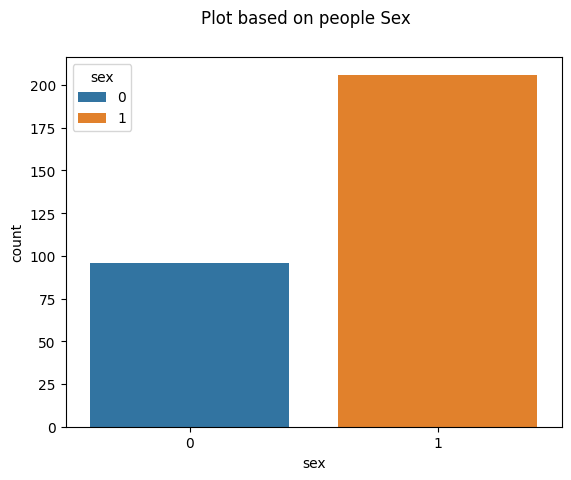

In [ ]:
sns.countplot(data=df, x="sex", hue='sex')
plt.suptitle('Plot based on people Sex')
plt.show()

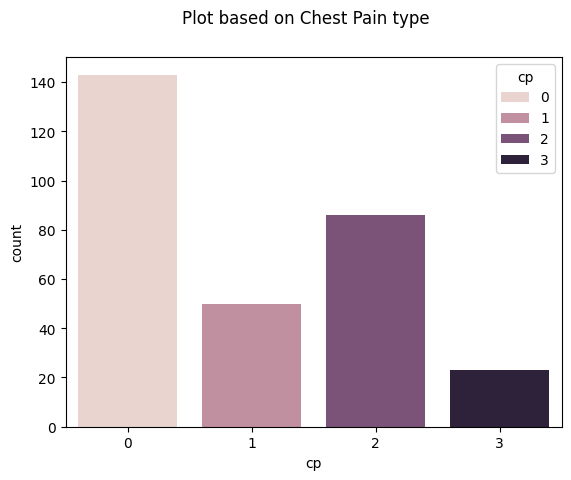

In [ ]:
sns.countplot(data=df, x="cp", hue='cp')
plt.suptitle('Plot based on Chest Pain type')
plt.show()

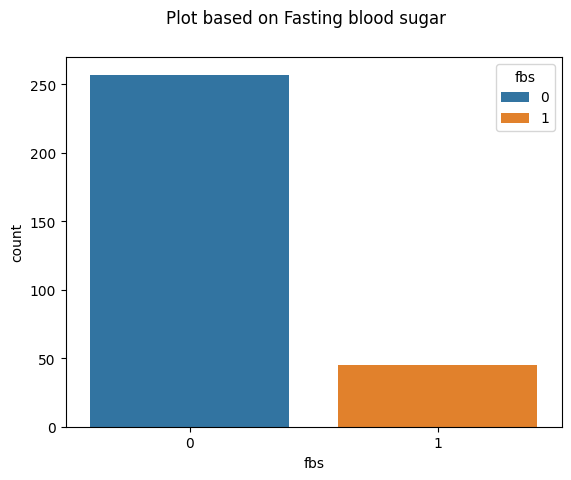

In [ ]:
sns.countplot(data=df, x="fbs", hue='fbs')
plt.suptitle('Plot based on Fasting blood sugar')
plt.show()

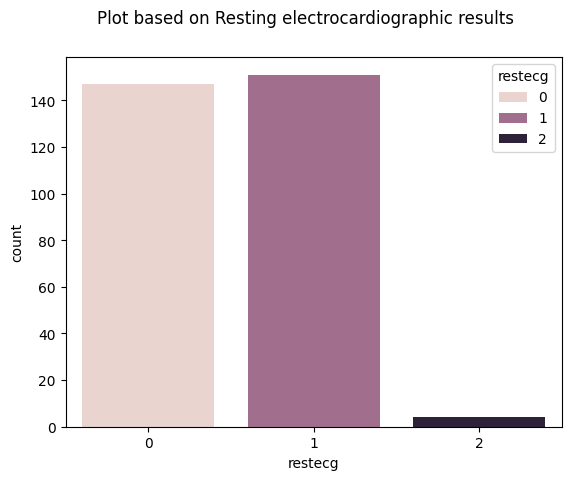

In [ ]:
sns.countplot(data=df, x="restecg", hue='restecg')
plt.suptitle('Plot based on Resting electrocardiographic results')
plt.show()

**import libraries for ML algorithms**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix

Assuming ```output``` is the column representing the likelihood of a heart attack

In [ ]:
X = df.drop('output', axis=1)
y = df['output']

Split the data into training and testing sets

80 % for train

20% for test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Initialize the model**

max_iter : Maximum number of iterations taken for the solvers to converge.

In [ ]:
model = LogisticRegression(max_iter=1000)

**Train the model**

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

**Make predictions on the test set**

In [ ]:
y_pred = model.predict(X_test)

<b>True Positives (TP):</b> The model correctly predicted positive instances.

<b>False Positives (FP):</b> The model incorrectly predicted positive instances.

<b>True Negatives (TN):</b> The model correctly predicted negative instances.

<b>False Negatives (FN):</b> The model incorrectly predicted negative instances.

<b>Confusion Matrix:</b>

A confusion matrix provides a tabular summary of the number of true positives, true negatives, false positives, and false negatives.

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[24,  5],
       [ 6, 26]], dtype=int64)

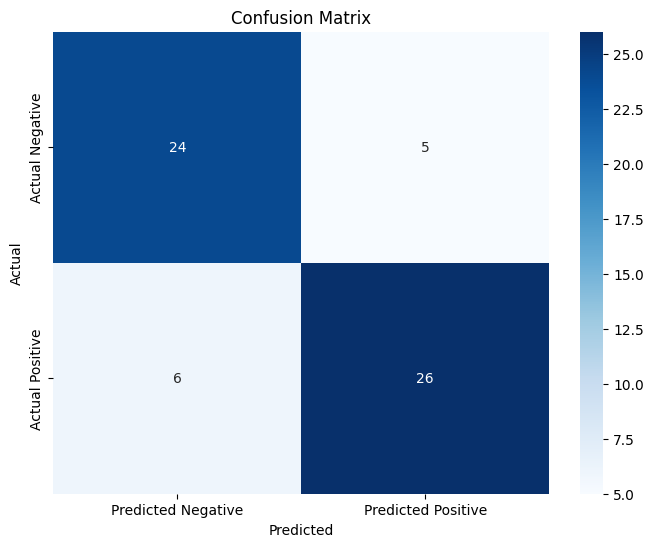

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<b>Precision:</b>

Precision measures the proportion of true positives (correctly predicted positives) out of all predicted positives.

Precision is the ratio of true positives to the sum of true positives and false positives. It answers the question: "Of all the positive predictions made by the model, how many were actually correct?"

Precision is important when minimizing false positives is crucial. For example, in medical diagnoses, a high precision means a low rate of misdiagnoses.

Formula: 

\begin{align}
Precision = \frac{TP}{TP+FP}
\end{align}

In [ ]:
# Calculate precision
precision = precision_score(y_test, y_pred)
print('Precision:', precision)

Precision: 0.8387096774193549


<b>Recall (Sensitivity, True Positive Rate):</b>

Recall measures the proportion of true positives out of all actual positives.

Recall, also known as sensitivity or true positive rate, is the ratio of true positives to the sum of true positives and false negatives. It answers the question: "Of all the actual positive instances, how many were correctly predicted by the model?"

Recall is important when minimizing false negatives is crucial. For instance, in spam detection, a high recall means a low rate of missing actual spam emails.

Formula: 

\begin{align}
Recall = \frac{TP}{TP+FN}
\end{align}

In [ ]:
# Calculate recall
recall = recall_score(y_test, y_pred)
print('Recall:', recall)

Recall: 0.8125


<b>F1-Score:</b>

The F1-Score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

The F1-Score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The harmonic mean gives more weight to lower values, making the F1-Score sensitive to both false positives and false negatives.

The F1-Score is useful when you want to find a balance between precision and recall, and you don't want to favor one over the other.

Formula:

\begin{align}
F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}
\end{align}

In [ ]:
# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print('F1-Score:', f1)

F1-Score: 0.8253968253968254


## Decision Tree (for  Multi-Class Classification)

### About The Dataset 

**The target feature is**
Drug type

**The feature sets are:**
* Age
* Sex
* Blood Pressure Levels (BP)
* Cholesterol Levels
* Na to Potassium Ration


**Reading Dataset**

In [39]:
path = './drug.csv'
drugs = pd.read_csv(path)

Now let's take a look at the first 5 rows of the data:

In [40]:
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


```df.info()``` shows that we have no NaN value.

In [42]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Check Null values (We don't have any null values)

In [43]:
drugs.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Checking for duplicate rows, we dont have any duplicated row

In [44]:
drugs[drugs.duplicated()]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


We take a look to diffrent values for some columns

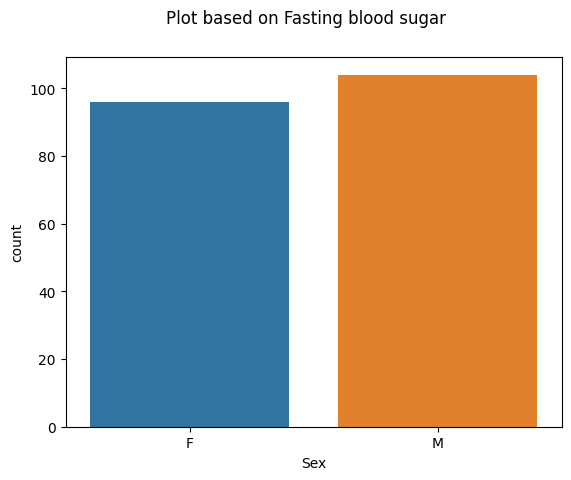

In [55]:
sns.countplot(data=drugs, x="Sex", hue='Sex')
plt.suptitle('Plot based on Sex column')
plt.show()

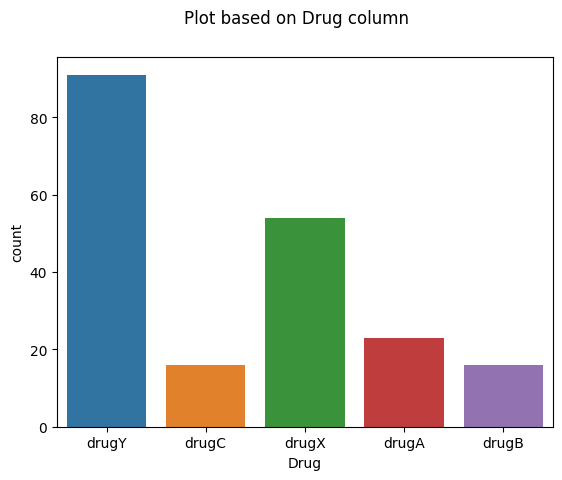

In [56]:
sns.countplot(data=drugs, x="Drug", hue='Drug')
plt.suptitle('Plot based on Drug column')
plt.show()

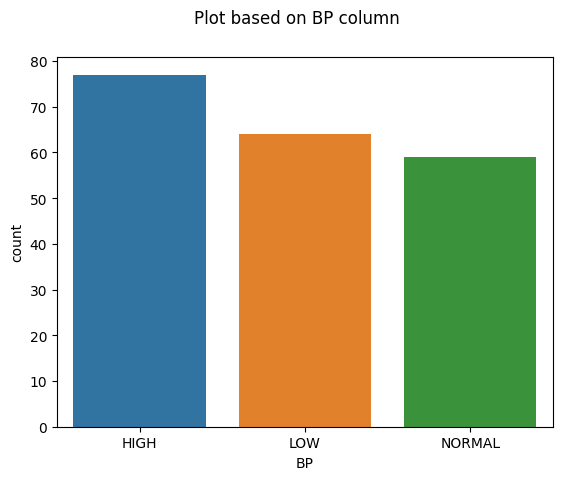

In [57]:
sns.countplot(data=drugs, x="BP", hue='BP')
plt.suptitle('Plot based on BP column')
plt.show()

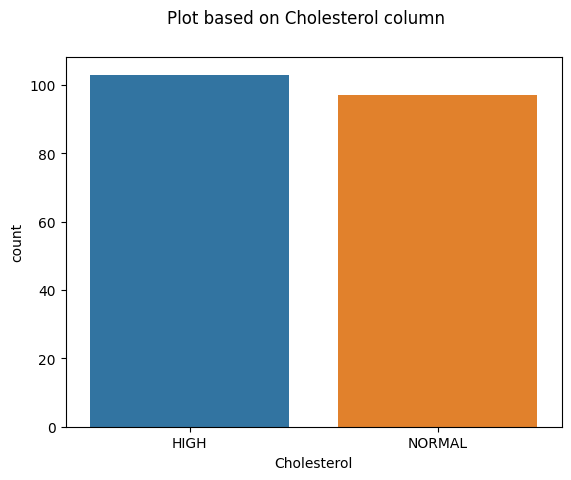

In [58]:
sns.countplot(data=drugs, x="Cholesterol", hue='Cholesterol')
plt.suptitle('Plot based on Cholesterol column')
plt.show()

Using <b>drugs</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of drugs) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>


Remove the column containing the target name since it doesn't contain numeric values.


In [45]:
X = drugs[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368],
       [47, 'F', 'LOW', 'HIGH', 11.767],
       [34, 'F', 'HIGH', 'NORMAL', 19.199],
       [43, 'M', 'LOW', 'HIGH', 15.376],
       [74, 'F', 'LOW', 'HIGH', 20.942],
       [50, 'F', 'NORMAL', 'HIGH', 12.703],
       [16, 'F', 'HIGH', 'NORMAL', 15.516],
       [69, 'M', 'LOW', 'NORMAL', 11.455],
       [43, 'M', 'HIGH', 'HIGH', 13.972],
       [23, 'M', 'LOW', 'HIGH', 7.298],
       [32, 'F', 'HIGH', 'NORMAL', 25.974],
       [57, 'M', 'LOW', 'NORMAL', 19.128],
       [63, 'M', 'NORMAL', 'HIGH', 25.917],
       [47, 'M', 'LOW', 'NORMAL', 30.568],
       [48, 'F', 'LOW',

Some features in this dataset are categorical, such as **Sex** or **BP**.

Sklearn Decision Trees does not handle categorical variables.

We Use Label Encode for covert these feature to numerical values.


In [46]:
le_sex = LabelEncoder()
le_sex.fit(['F', 'M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = LabelEncoder()
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = LabelEncoder()
le_Chol.fit(['NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

Now , all of our data is numerical

In [47]:
X

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607],
       [49, 0, 2, 0, 16.275],
       [41, 1, 1, 0, 11.037],
       [60, 1, 2, 0, 15.171],
       [43, 1, 1, 1, 19.368],
       [47, 0, 1, 0, 11.767],
       [34, 0, 0, 1, 19.199],
       [43, 1, 1, 0, 15.376],
       [74, 0, 1, 0, 20.942],
       [50, 0, 2, 0, 12.703],
       [16, 0, 0, 1, 15.516],
       [69, 1, 1, 1, 11.455],
       [43, 1, 0, 0, 13.972],
       [23, 1, 1, 0, 7.298],
       [32, 0, 0, 1, 25.974],
       [57, 1, 1, 1, 19.128],
       [63, 1, 2, 0, 25.917],
       [47, 1, 1, 1, 30.568],
       [48, 0, 1, 0, 15.036],
       [33, 0, 1, 0, 33.486],
       [28, 0, 0, 1, 18.809],
       [31, 1, 0, 0, 30.366],
       [49, 0, 2, 1, 9.381],
       [39, 0, 1, 1, 22.697],
       [45, 1, 1, 0, 17.951],
       [18, 0, 2, 1, 8.75],
       [74, 1, 0, 0, 9.567],
       [49, 1, 1, 1, 11.014],
       [65, 0, 0,

Now we can fill the target variable.


In [49]:
y = drugs["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object



**Setting up the Decision Tree**

We will be using train/test split on our decision tree.

we import train_test_split above .



In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Shape of Train and Test

In [62]:
X_train.shape,X_test.shape

((160, 5), (40, 5))

**Train the model**

We will first create an instance of the DecisionTreeClassifier.

Inside of the classifier, specify  criterion="entropy" so we can see the information gain of each node.

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix <b> X_train </b> and training  response vector <b> y_train </b>


In [66]:
drugTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

**Prediction**

Let's make some predictions on the testing dataset



In [69]:
predTree = drugTree.predict(X_test)
predTree[0:5], y_test[0:5]

(array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY'], dtype=object),
 95     drugX
 15     drugY
 30     drugX
 158    drugC
 128    drugY
 Name: Drug, dtype: object)

**Confusion Matrix**

The confusion matrix illustrates how the algorithm is performing w.r.t. distiguishing the classes from each other. In a glance, we can see how well our alogorithm is doing classfying one class against another.

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, predTree)

array([[ 6,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0, 15]], dtype=int64)

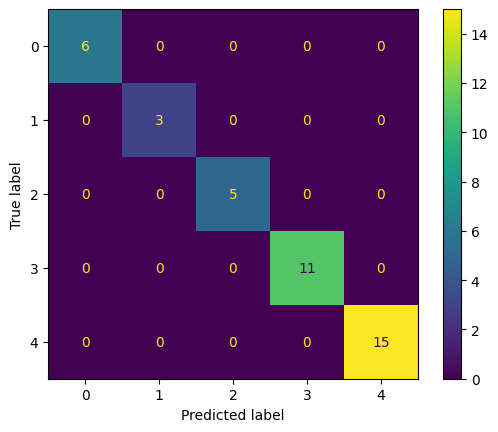

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, predTree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Precision and Recall

we need to calculate the precision and recall for each class individually:

In [76]:
drugs['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [87]:
precision_array = []
recall_array = []
for c in ['drugY','drugX', 'drugA', 'drugC','drugB']:
  actual_class = y_test == c
  predicted_class = predTree == c

  ture_positives = sum(np.multiply(actual_class,predicted_class))
  declared_positives = sum(predicted_class)
  actual_positives = sum(actual_class)

  precision = ture_positives/(0.0001+ declared_positives)
  recall = ture_positives/(0.0001+ actual_positives)
  precision_array.append(precision)
  recall_array.append(recall)

precision_array = np.array(precision_array)
recall_array = np.array(recall_array)

In [83]:
precision_array

array([0.99999333, 0.99999091, 0.99998333, 0.99998   , 0.99996667])

In [84]:
recall_array

array([0.99999333, 0.99999091, 0.99998333, 0.99998   , 0.99996667])

In [85]:
print('Average precision is: %.2f' %precision_array.mean())
print('Average recall is: %.2f' %recall_array.mean())

Average precision is: 1.00
Average recall is: 1.00


Now that we have the precision and recall for each class, we can calculate the F1-Score.

In [89]:
f1_array = []
for c in [0, 1, 2, 3, 4]:
  p,r = precision_array[c],recall_array[c]
  f1 = 2*p*r / (p+r)
  f1_array.append(f1)
  print('F1-Score for class %d is %.2f' %(c,f1))

F1-Score for class 0 is 1.00
F1-Score for class 1 is 1.00
F1-Score for class 2 is 1.00
F1-Score for class 3 is 1.00
F1-Score for class 4 is 1.00


Now that we have the f1 accuracy for each class, we can calculate different types of F1-Score for this problem:

**Macro F1-Score**

In [90]:
# Macro F1-Score
print('Macro F1-score is %.2f' %np.array(f1_array).mean())

Macro F1-score is 1.00


**Weighted F1-Score**

In [94]:
from sklearn.metrics import f1_score
print('Weighted F1-score is %.2f' %f1_score(y_test, predTree, average='weighted'))

Weighted F1-score is 1.00


**Micro F1-Score**

In [95]:
print('Micro F1-score is %.2f' %f1_score(y_test, predTree, average='micro'))

Micro F1-score is 1.00


**All in one report**

In [97]:
from sklearn.metrics import classification_report
print('Clasification report:\n', classification_report(y_test, predTree))

Clasification report:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



## Question :

Suppose we have a multi-label classification problem in the field of football, where each sample (player) can belong to some of 4 classes that we have:

* Class 1: The player has played for the national team before

* Class 2: The player had previous history of heart problems

* Class 3: The player had knee injuries before

* Class 4: The player has been the captain of the team in the past

What accuracy metric do you use to best capture the accuracy of classification algorithm which predicts the above classes based on some data from each player and why?

***Answer***

In classification problems that are in the form of multiple labels, using the accuracy criterion does not give a suitable output, because in these problems each sample can belong to several classes at the same time.

One commonly used metric for multi-label classification is the Hamming Loss.

Hamming Loss is calculated by taking a fraction of the wrong prediction with the total number of labels.

Formula :

\begin{align}
\text{Hamming Loss} = \frac{1}{N} \sum_{i=1}^{N} \frac{1}{L} \sum_{j=1}^{L} \delta(y_{ij} \neq \hat{y}_{ij})
\end{align}

* N is number of samples

* L is number of classes

* Yij is the actual label (for each sample , ith sample and jth label)

* Y^ij is the predicted label (for each sample, ith sample and jth label)

* Delta is the indicator function , which equals 1 if Yij not equal to Y^ij and 0 for otherwise

The Hamming Loss ranges from 0 to 1, with lower values indicating better performance.

Hamming Loss is suitable for multi-label classification problems because it penalizes both false positives and false negatives for each class independently. This is important because in multi-label classification, a sample can belong to multiple classes at the same time.

Using traditional accuracy in a multi-label scenario could lead to misleading conclusions. For example, if a model predicts 3 out of 4 classes correctly for a sample, it would be considered as 0% accuracy using traditional accuracy, but it actually performed reasonably well.

By using Hamming Loss, you get a more nuanced view of how well the model is performing in terms of classifying multiple labels for each sample.